In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-imdb-dataset/movies_data.csv
/kaggle/input/top-1000-imdb-dataset/imdb_top_1000.csv


In [2]:
df=pd.read_csv('/kaggle/input/top-1000-imdb-dataset/imdb_top_1000.csv')

In [3]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [6]:
df.values

array([['https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg',
        'The Shawshank Redemption', '1994', ..., 'William Sadler',
        2343110, '28,341,469'],
       ['https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg',
        'The Godfather', '1972', ..., 'Diane Keaton', 1620367,
        '134,966,411'],
       ['https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg',
        'The Dark Knight', '2008', ..., 'Michael Caine', 2303232,
        '534,858,444'],
       ...,
       ['https://m.media-amazon.com/images/M/MV5BM2U3YzkxNGMtYWE0YS00ODk0LTk1ZGEtNjk3ZTE0MTk4MzJjXkEyXkFqcGdeQXVyNDk0MDg4NDk@._V1_UX67_CR0,0,67,98_AL_.jpg',
        'From Here to Eternity', '1953', ..., 'Donna Reed', 43374,
        '30,500,000'],
       ['https://m.media-a

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [9]:
df.tail(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [10]:
df.sample(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
294,https://m.media-amazon.com/images/M/MV5BZmY3MD...,Sanjuro,1962,U,96 min,"Action, Comedy, Crime",8.1,A crafty samurai helps a young man and his fel...,NaN,Akira Kurosawa,Toshirô Mifune,Tatsuya Nakadai,Keiju Kobayashi,Yûnosuke Itô,33044,NaN
763,https://m.media-amazon.com/images/M/MV5BMmE3OW...,This Is England,2006,NaN,101 min,"Crime, Drama",7.7,A young boy becomes friends with a gang of ski...,86.0,Shane Meadows,Thomas Turgoose,Stephen Graham,Jo Hartley,Andrew Shim,115576,"327,919"
66,https://m.media-amazon.com/images/M/MV5BMjExMT...,WALL·E,2008,U,98 min,"Animation, Adventure, Family",8.4,"In the distant future, a small waste-collectin...",95.0,Andrew Stanton,Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willard,999790,"223,808,164"
222,https://m.media-amazon.com/images/M/MV5BMTg0NT...,Prisoners,2013,A,153 min,"Crime, Drama, Mystery",8.1,When Keller Dover's daughter and her friend go...,70.0,Denis Villeneuve,Hugh Jackman,Jake Gyllenhaal,Viola Davis,Melissa Leo,601149,"61,002,302"
758,https://m.media-amazon.com/images/M/MV5BNDliMT...,Papurika,2006,U,90 min,"Animation, Drama, Fantasy",7.7,When a machine that allows therapists to enter...,81.0,Satoshi Kon,Megumi Hayashibara,Tôru Emori,Katsunosuke Hori,Tôru Furuya,71379,"881,302"


In [11]:
df=df.drop(columns=["Poster_Link","Certificate"]) # istemediğim sutunları attım

In [12]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Overview       1000 non-null   object 
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [14]:
df[["Series_Title","Released_Year","Runtime"]] # belirli sütunları seçmek için kullandım

,Series_Title,Released_Year,Runtime
0,The Shawshank Redemption,1994,142 min
1,The Godfather,1972,175 min
2,The Dark Knight,2008,152 min
3,The Godfather: Part II,1974,202 min
4,12 Angry Men,1957,96 min
...,...,...,...
995,Breakfast at Tiffany's,1961,115 min
996,Giant,1956,201 min
997,From Here to Eternity,1953,118 min
998,Lifeboat,1944,97 min


In [15]:
df=df[df['Released_Year']!="PG"]

In [16]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

In [17]:
df['Released_Year']=pd.to_numeric(df['Released_Year']) # yılları numeric hale getirdim

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Runtime        999 non-null    object 
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 117.1+ KB


In [19]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [20]:
df['Runtime']=pd.to_numeric(df['Runtime'].str.replace(" min",""))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 117.1+ KB


In [22]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [23]:
df['Gross']=df['Gross'].str.replace(",","") #virgülleri kaldır

In [24]:
df['Gross']=pd.to_numeric(df['Gross'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(8)
memory usage: 117.1+ KB


In [26]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [27]:
filtre=df['Gross']>=600000000
filtre2=df['IMDB_Rating']>=8
df[filtre & filtre2]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
59,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
60,Avengers: Infinity War,2018,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
357,The Avengers,2012,143,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0


In [28]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [29]:
filtre=df['Genre'].str.contains("Action")
df[filtre]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
5,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
8,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
10,The Lord of the Rings: The Fellowship of the Ring,2001,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0
13,The Lord of the Rings: The Two Towers,2002,179,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,342551365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Falling Down,1993,113,"Action, Crime, Drama",7.6,An ordinary man frustrated with the various fl...,56.0,Joel Schumacher,Michael Douglas,Robert Duvall,Barbara Hershey,Rachel Ticotin,171640,40903593.0
979,Lethal Weapon,1987,109,"Action, Crime, Thriller",7.6,Two newly paired cops who are complete opposit...,68.0,Richard Donner,Mel Gibson,Danny Glover,Gary Busey,Mitchell Ryan,236894,65207127.0
982,Mad Max 2,1981,96,"Action, Adventure, Sci-Fi",7.6,"In the post-apocalyptic Australian wasteland, ...",77.0,George Miller,Mel Gibson,Bruce Spence,Michael Preston,Max Phipps,166588,12465371.0
983,The Warriors,1979,92,"Action, Crime, Thriller",7.6,"In the near future, a charismatic leader summo...",65.0,Walter Hill,Michael Beck,James Remar,Dorsey Wright,Brian Tyler,93878,22490039.0


In [30]:
sorgu=df['Series_Title']+" "+df['Overview']

In [31]:
sorgu=sorgu.str.lower()

In [32]:
count_love=len(df[sorgu.str.contains('love')])
count_money=len(df[sorgu.str.contains('money')])

In [33]:
count_money

8

In [34]:
count_love

85

In [35]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [36]:
df['G/R']=df['Gross']/df['Runtime']

In [37]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1.995878e+05
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7.712366e+05
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3.518806e+06


In [38]:
df['G/R'].sort_values()

630    13.882979
624    25.531915
390    37.885057
605    54.285714
141    55.679104
         ...    
993          NaN
995          NaN
996          NaN
998          NaN
999          NaN
Name: G/R, Length: 999, dtype: float64

In [39]:
df.sort_values(by="G/R",ascending=False)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
477,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,6.787407e+06
891,Incredibles 2,2018,118,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0,5.157472e+06
43,The Lion King,1994,88,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,88.0,Roger Allers,Rob Minkoff,Matthew Broderick,Jeremy Irons,James Earl Jones,942045,422783777.0,4.804361e+06
59,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,4.742392e+06
623,Avatar,2009,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,4.694492e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Blowup,1966,111,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN,NaN
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN
996,Giant,1956,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN
998,Lifeboat,1944,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN


In [40]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1.995878e+05
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7.712366e+05
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3.518806e+06


In [41]:
df.corr(numeric_only=True).style.background_gradient()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,G/R
Released_Year,1.000000,0.165807,-0.131053,-0.339272,0.241785,0.233250,0.236491
Runtime,0.165807,1.000000,0.244112,-0.031399,0.173304,0.139104,0.020005
IMDB_Rating,-0.131053,0.244112,1.000000,0.268641,0.495361,0.097490,0.060132
Meta_score,-0.339272,-0.031399,0.268641,1.000000,-0.018519,-0.030560,-0.019599
No_of_Votes,0.241785,0.173304,0.495361,-0.018519,1.000000,0.574877,0.540474
Gross,0.233250,0.139104,0.097490,-0.030560,0.574877,1.000000,0.970171
G/R,0.236491,0.020005,0.060132,-0.019599,0.540474,0.970171,1.000000


In [42]:
df.corr(numeric_only=True).style.background_gradient().to_excel("corr.xlsx")

In [43]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1.995878e+05
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7.712366e+05
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3.518806e+06


In [44]:
gr=df.groupby('Released_Year').mean(numeric_only=True)

In [45]:
import matplotlib.pyplot as plt

In [46]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1.995878e+05
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7.712366e+05
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3.518806e+06


In [47]:
gr.head(3)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,G/R
Released_Year,,,,,,
1920,76.0,8.1,NaN,57428.0,NaN,NaN
1921,68.0,8.3,NaN,113314.0,5450000.0,80147.058824
1922,94.0,7.9,NaN,88794.0,NaN,NaN


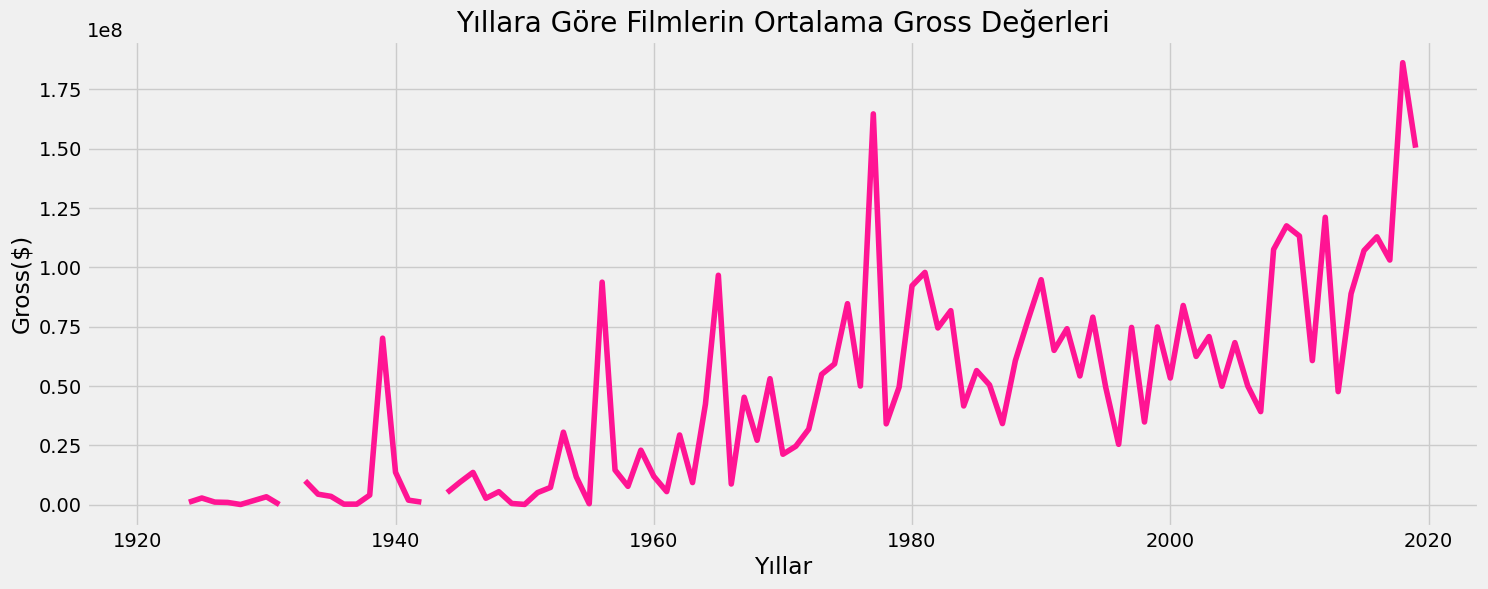

In [48]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.title("Yıllara Göre Filmlerin Ortalama Gross Değerleri")
plt.xlabel("Yıllar")
plt.ylabel("Gross($)")
plt.plot(gr.index,gr['Gross'],color="deeppink")
plt.show()

In [49]:
df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,G/R
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1.995878e+05
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7.712366e+05
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3.518806e+06


In [50]:
gr.head(3)

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,G/R
Released_Year,,,,,,
1920,76.0,8.1,NaN,57428.0,NaN,NaN
1921,68.0,8.3,NaN,113314.0,5450000.0,80147.058824
1922,94.0,7.9,NaN,88794.0,NaN,NaN


In [51]:
gr.index.astype('str')

Index(['1920', '1921', '1922', '1924', '1925', '1926', '1927', '1928', '1930',
       '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939',
       '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948',
       '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='Released_Year')

In [ ]:
with plt.xkcd():
    plt.figure(figsize=(16,6))
    plt.bar(gr.index.astype('str')[-30:],gr['No_of_Votes'][-30:],color=["lightblue","deeppink"])
    plt.title("Yıllara Göre Filmlerin Değerlendirme Sayısı")
    plt.xlabel("Yıllar")
    plt.ylabel("Değerlendirme Sayısı")
    plt.xticks(rotation=90)
    plt.savefig('grafik.png')
    plt.show()

In [ ]:
df.head(3)

In [ ]:
kat=df['Genre'].str.split(",",expand=True)[0].value_counts()

In [ ]:
kat

In [ ]:
digertoplam=kat[7:].sum()

In [ ]:
katd=dict(kat[0:7])
katd['Diğer']=digertoplam
katd

In [ ]:
kat.index

In [ ]:
kat.values

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(katd.values(),labels=katd.keys(),autopct="%1.1f%%",explode=[0,0,0,0.5,0,0,0,0])
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
btc=yf.download('BTC-USD',"2016-01-01","2024-12-06").reset_index()

In [ ]:
btc.columns=["Tarih","Duz Kapanis","Kapanis","En Yuksek","En Dusuk","Acilis","Hacim"]

In [ ]:
btc.head(3)

In [ ]:
# Bitcoin çizgi grafiği günlere göre kapanis fiyatı

In [ ]:
btc.columns

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(btc['Tarih'],btc['Kapanis'])
plt.plot()

In [ ]:
# 8 ocak 2018 - 24 Nisan 2021

In [ ]:
btc.info()

In [ ]:
btc['Tarih'].dt.day==5

In [ ]:
btc.head(3)

In [ ]:
btc=btc.set_index('Tarih')

In [ ]:
btc.head(3)

In [ ]:
btc.iloc[5:10]

In [ ]:
btc.index=btc.index.astype('str')

In [ ]:
btc.loc['2018-01-08':'2021-04-24']

In [ ]:
# universel unique id

In [ ]:
import uuid

In [ ]:
uuid.uuid4()

In [ ]:
str(uuid.uuid4())